# Waste Management Submetric — Best Neighborhood in Pittsburgh

**Author:** Brady Baker  
**Dataset:** [Smart Trash Containers (WPRDC)](https://data.wprdc.org/dataset/smart-trash-containers)  
**Metric:** Number of smart trash containers per neighborhood  
**Goal:** Determine which Pittsburgh neighborhood has the best access to public waste and recycling facilities.

Clean and well-maintained neighborhoods contribute directly to quality of life.  
In this analysis, I’ll use the *Smart Trash Containers* dataset to identify which neighborhoods have the most containers,  
indicating better public services and environmental maintenance.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
trash = pd.read_csv("../datasets/Smart_Trash_Containers.csv")
trash.head()

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,385243,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,385244,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,385245,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
3,385246,4,74,2017-09-14T13:24:40,2022-10-24T12:40:24,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
4,385247,5,74,2017-09-19T12:22:45,2022-12-31T01:58:16,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444


In [5]:
trash.info()
trash.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  1194 non-null   int64  
 1   container_id         1194 non-null   int64  
 2   receptacle_model_id  1194 non-null   int64  
 3   assignment_date      1194 non-null   object 
 4   last_updated_date    1194 non-null   object 
 5   group_name           1194 non-null   object 
 6   address              1194 non-null   object 
 7   city                 1194 non-null   object 
 8   state                1194 non-null   object 
 9   zip                  1194 non-null   int64  
 10  neighborhood         1193 non-null   object 
 11  dpw_division         1193 non-null   float64
 12  council_district     1193 non-null   float64
 13  ward                 1193 non-null   float64
 14  fire_zone            1194 non-null   object 
 15  x                    1194 non-null   f

Index(['_id', 'container_id', 'receptacle_model_id', 'assignment_date',
       'last_updated_date', 'group_name', 'address', 'city', 'state', 'zip',
       'neighborhood', 'dpw_division', 'council_district', 'ward', 'fire_zone',
       'x', 'y'],
      dtype='object')

In [6]:
# Standardize column names
trash.columns = trash.columns.str.strip().str.lower()

# Drop missing neighborhoods
trash_clean = trash.dropna(subset=['neighborhood'])

# Quick check
trash_clean.head()


,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,385243,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,385244,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,385245,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
3,385246,4,74,2017-09-14T13:24:40,2022-10-24T12:40:24,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
4,385247,5,74,2017-09-19T12:22:45,2022-12-31T01:58:16,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444


In [7]:
# Count the number of containers per neighborhood
trash_counts = trash_clean['neighborhood'].value_counts().sort_values(ascending=False)
trash_counts.head(10)


neighborhood
Shadyside                76
East Liberty             68
Squirrel Hill South      63
Bloomfield               58
North Shore              53
South Side Flats         51
Strip District           42
Carrick                  38
Central Oakland          34
Central Lawrenceville    29
Name: count, dtype: int64

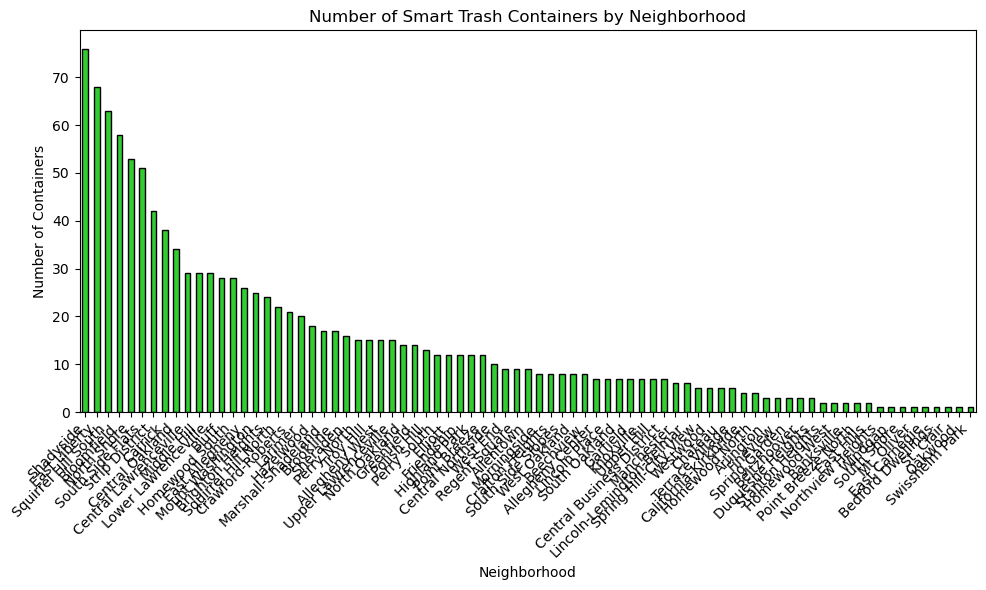

In [8]:
plt.figure(figsize=(10,6))
trash_counts.plot(kind='bar', color='limegreen', edgecolor='black')
plt.title('Number of Smart Trash Containers by Neighborhood')
plt.ylabel('Number of Containers')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
